In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
from sklearn import datasets
raw_wine = datasets.load_wine()

In [3]:
X = raw_wine.data
y = raw_wine.target

In [4]:
print(X.shape)

(178, 13)


In [5]:
print(set(y))

{0, 1, 2}


In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y)
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [9]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot, random_state = 0)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation


In [34]:
n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30
model = Sequential()

In [35]:
model.add(Dense(20, input_dim = n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                280       
                                                                 
 batch_normalization_1 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                                 
 activation_3 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_______________________________________________________

In [37]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [38]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 5)

Epoch 1/30
27/27 [==============================] - 1s 3ms/step - loss: 1.1806 - accuracy: 0.3835
Epoch 2/30
27/27 [==============================] - 0s 3ms/step - loss: 0.9840 - accuracy: 0.4887
Epoch 3/30
27/27 [==============================] - 0s 3ms/step - loss: 0.8874 - accuracy: 0.5639
Epoch 4/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8216 - accuracy: 0.6316
Epoch 5/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7804 - accuracy: 0.6391
Epoch 6/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7955 - accuracy: 0.6165
Epoch 7/30
27/27 [==============================] - 0s 3ms/step - loss: 0.8407 - accuracy: 0.6015
Epoch 8/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7764 - accuracy: 0.6241
Epoch 9/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7721 - accuracy: 0.5940
Epoch 10/30
27/27 [==============================] - 0s 3ms/step - loss: 0.7383 - accuracy: 0.5789
Epoch 11/30
27/27 [

In [39]:
print(model.evaluate(X_tn, y_tn)[1])

5/5 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.6316
0.6315789222717285


In [40]:
print(model.evaluate(X_te, y_te)[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.7767 - accuracy: 0.5556
0.5555555820465088


In [41]:
import numpy as np
epoch = np.arange(1, epo + 1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [42]:
accuracy = hist.history['accuracy']

In [43]:
print(accuracy)

[0.3834586441516876, 0.4887218177318573, 0.5639097690582275, 0.6315789222717285, 0.6390977501869202, 0.61654132604599, 0.6015037298202515, 0.6240601539611816, 0.5939849615097046, 0.5789473652839661, 0.6842105388641357, 0.6315789222717285, 0.7293233275413513, 0.7593985199928284, 0.8195488452911377, 0.7819548845291138, 0.7744361162185669, 0.7969924807548523, 0.7368420958518982, 0.8270676732063293, 0.8571428656578064, 0.8571428656578064, 0.8872180581092834, 0.8496240377426147, 0.8947368264198303, 0.8721804618835449, 0.902255654335022, 0.8872180581092834, 0.8421052694320679, 0.8872180581092834]


In [44]:
loss = hist.history['loss']

In [45]:
print(loss)

[1.1806256771087646, 0.9840450286865234, 0.8874258399009705, 0.821586012840271, 0.7804238796234131, 0.7955266833305359, 0.8407450914382935, 0.7764022946357727, 0.7720507979393005, 0.7383026480674744, 0.7047507166862488, 0.681833028793335, 0.6537958383560181, 0.6523208022117615, 0.6145584583282471, 0.5937243103981018, 0.5843662619590759, 0.6010273694992065, 0.6729463338851929, 0.5458266735076904, 0.510371208190918, 0.4913313388824463, 0.40038806200027466, 0.4903678596019745, 0.43493545055389404, 0.40696147084236145, 0.36139073967933655, 0.3695639669895172, 0.3645085096359253, 0.37814849615097046]


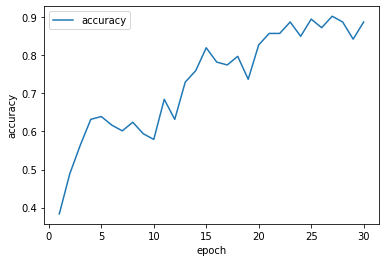

In [46]:
import matplotlib.pyplot as plt
plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

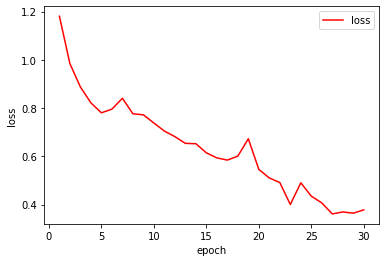

In [48]:

plt.plot(epoch, loss, 'r', label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()